In [1]:
from utils.loader import USAGE, BENEFITS
from usage_process import average_utilization
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Loaded 50000 benefits usage data!
Loaded 50000 employees benefits usage data!


In [2]:
usage = USAGE
benefits = BENEFITS

In [3]:
usage['LastUsedDate'] = pd.to_datetime(usage['LastUsedDate'])
usage.set_index('LastUsedDate', inplace=True)


In [4]:
usage_week = usage.resample('W').mean()

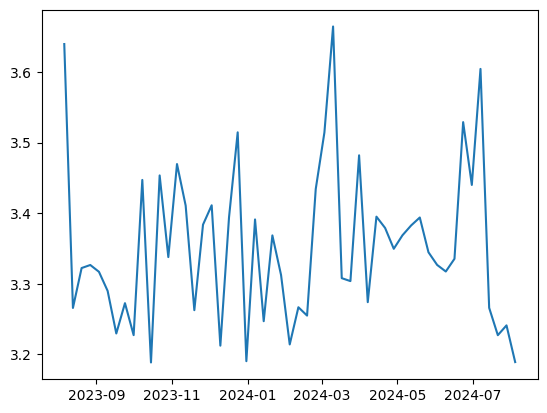

In [5]:
plt.plot(usage_week['UsageFrequency'])

In [7]:
usage_week

,EmployeeID,BenefitID,UsageFrequency
LastUsedDate,,,
2023-08-06,2282.577869,15.307377,3.639344
2023-08-13,2487.438559,15.684322,3.265890
2023-08-20,2516.874468,15.038298,3.322340
2023-08-27,2532.173867,15.832455,3.326660
2023-09-03,2507.998981,15.431193,3.317023
2023-09-10,2553.121622,15.225572,3.290021
2023-09-17,2591.755717,15.247401,3.229730
2023-09-24,2539.311134,15.530697,3.272633
2023-10-01,2541.307120,15.362380,3.227418


In [12]:
usage_day = usage.resample('D').mean()

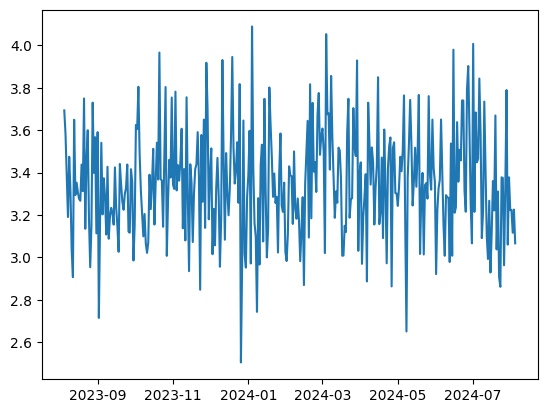

In [13]:
plt.plot(usage_day['UsageFrequency'])

In [ ]:
for benefitID in usage['BenefitID'].unique():
    print(benefitID)

AttributeError: 'numpy.ndarray' object has no attribute 'sorted'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_mean_usage_by_period(
    usage: pd.DataFrame,
    period: str = "month",
    value_col: str = "UsageFrequency",
    id_col: str = "BenefitID",
    date_col: str = "LastUsedDate",
):

    df = usage.copy()
    if date_col in df.columns:
        df[date_col] = pd.to_datetime(df[date_col], errors="coerce")
        df = df.dropna(subset=[date_col]).set_index(date_col)
    else:
        if not isinstance(df.index, pd.DatetimeIndex):
            raise ValueError(
                f"'{date_col}' must be a datetime column or datetime index."
            )
        df.index.name = date_col

    freq_map = {"day": "D", "week": "W", "month": "MS", "year": "YS"}
    period_lower = period.lower()
    if period_lower not in freq_map:
        raise ValueError("period must be one of: 'day', 'week', 'month', 'year'")
    freq = freq_map[period_lower]

    results = {}
    for benefit_id, subdf in df.groupby(id_col):
        agg = (
            subdf[value_col]
            .resample(freq)
            .mean()
            .reset_index()
            .rename(columns={value_col: "MeanUsage"})
        )

        fig, ax = plt.subplots()
        ax.plot(agg[date_col], agg["MeanUsage"], marker="o")
        ax.set_title(f"Mean {value_col} for Benefit {benefit_id} by {period_lower.title()}")
        ax.set_xlabel(period_lower.title())
        ax.set_ylabel("Mean UsageFrequency")
        plt.tight_layout()

        results[benefit_id] = {"data": agg, "ax": ax}

    return results


/var/folders/4z/59z7pkgj7csd3hvms1d3bqbr0000gn/T/ipykernel_12016/2691125676.py:65: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


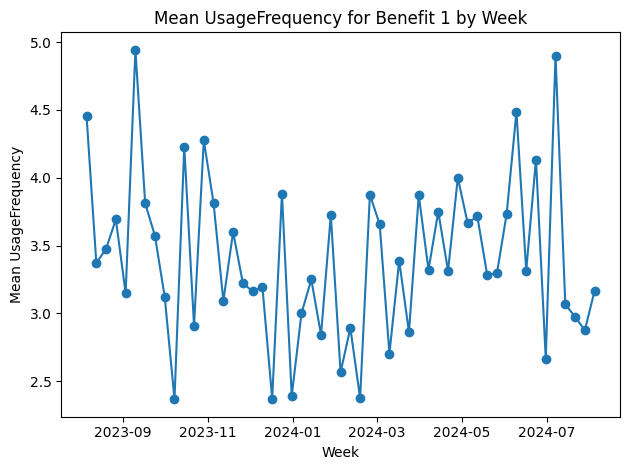

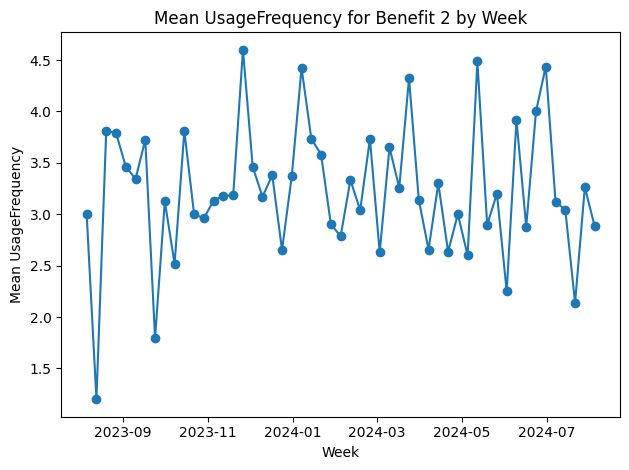

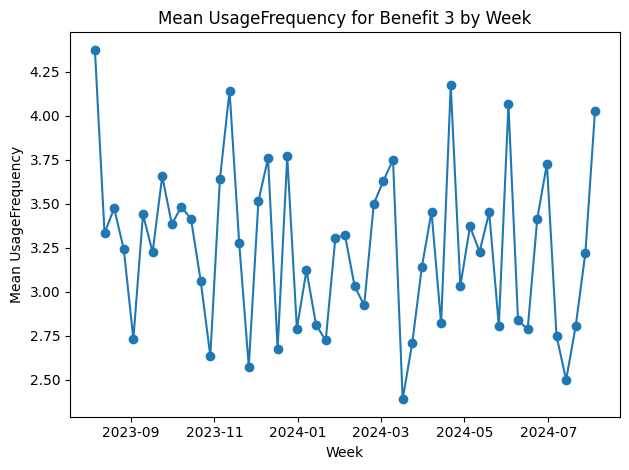

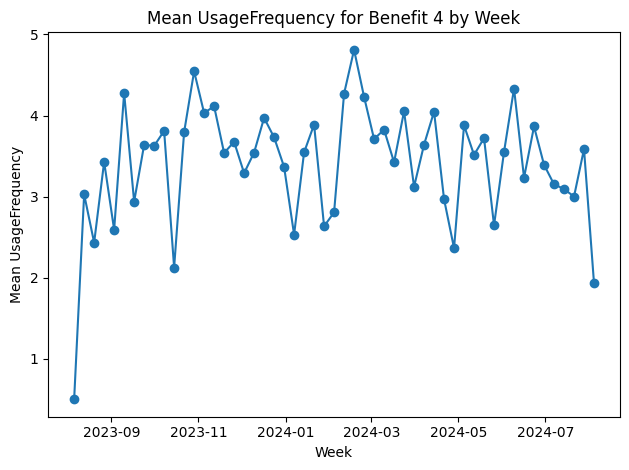

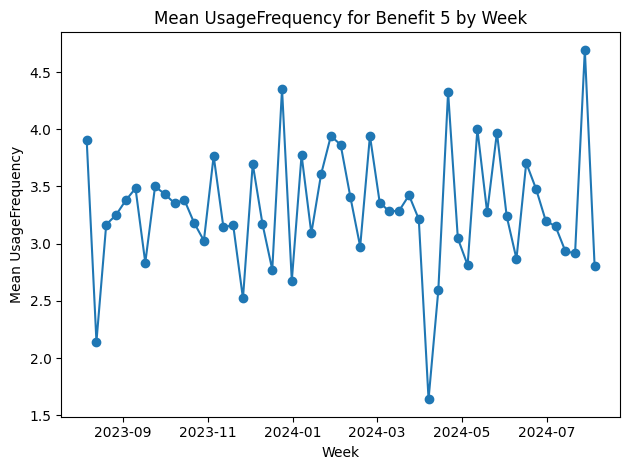

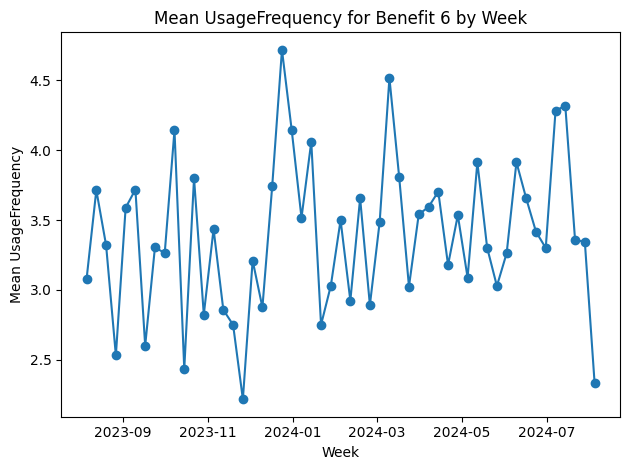

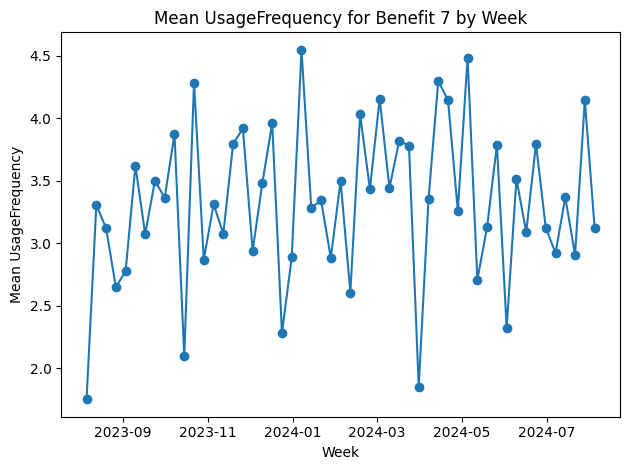

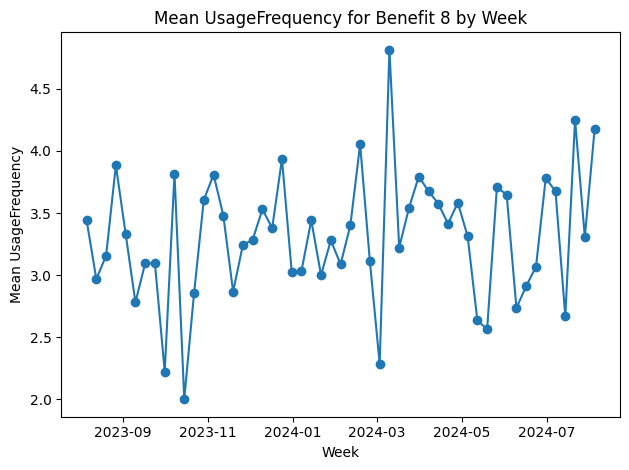

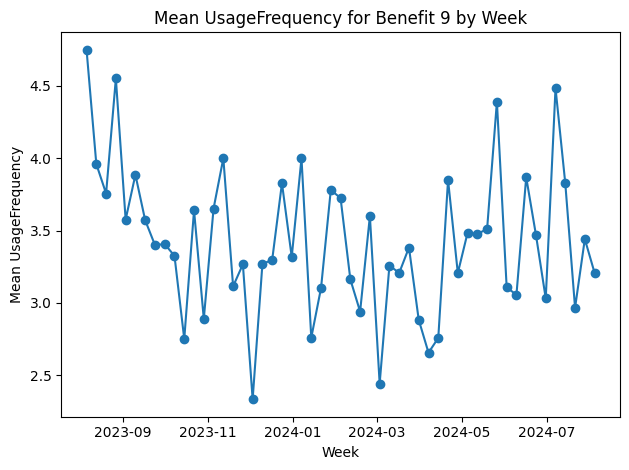

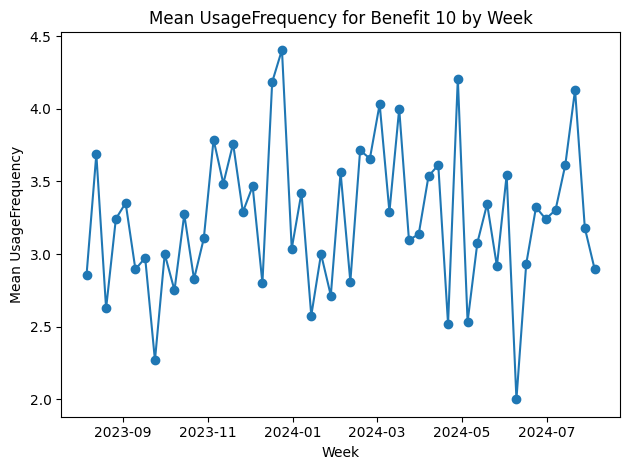

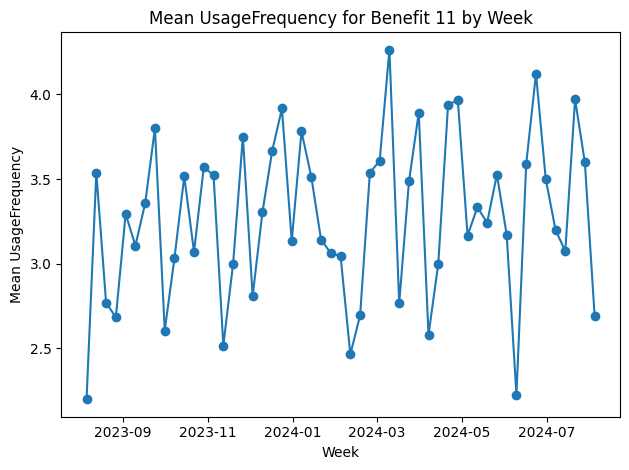

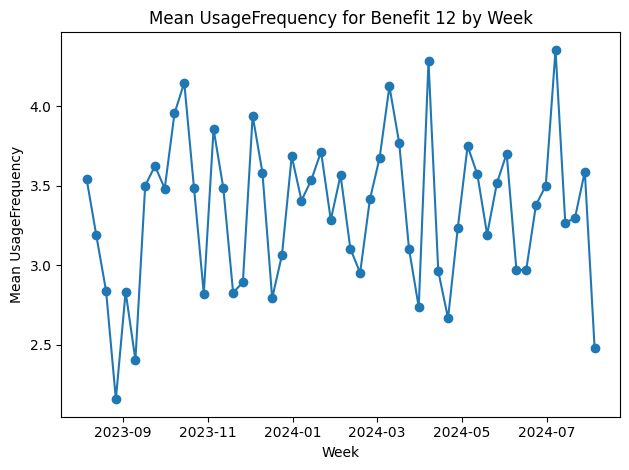

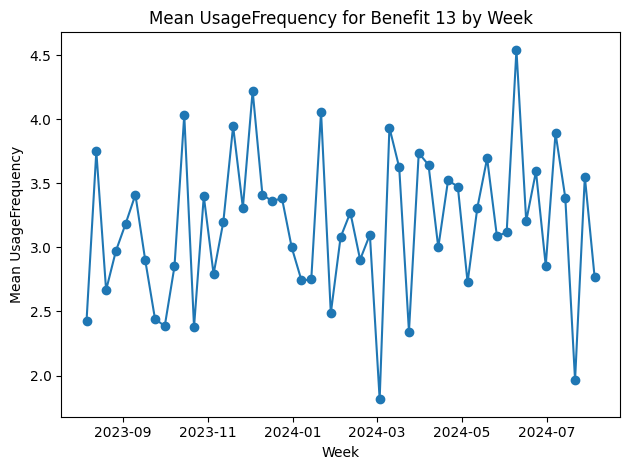

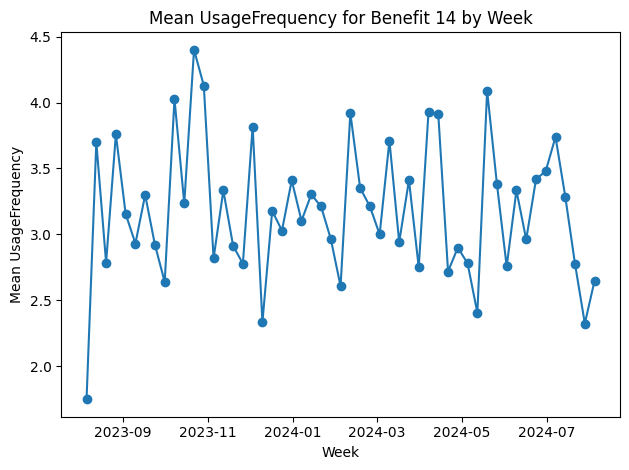

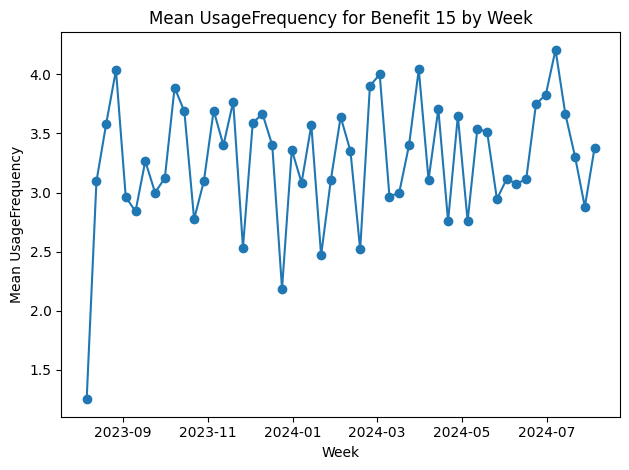

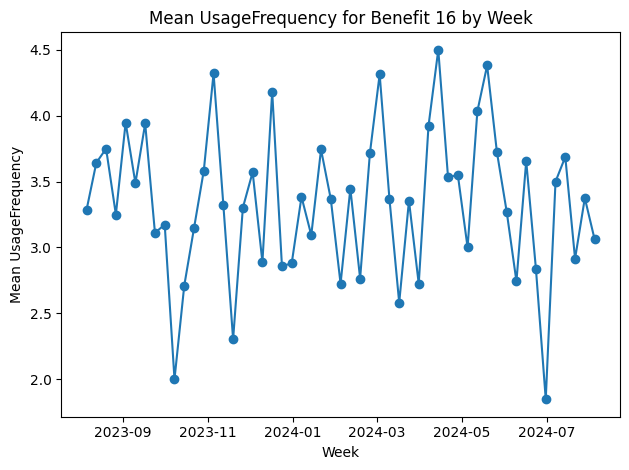

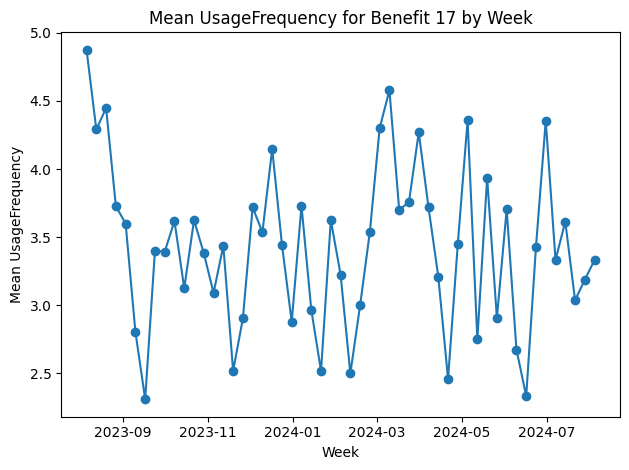

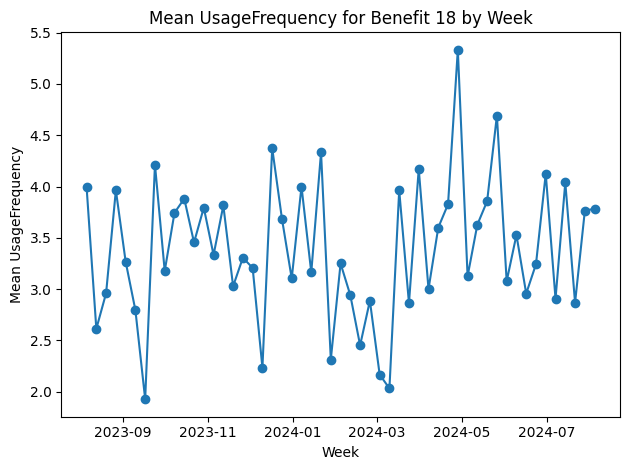

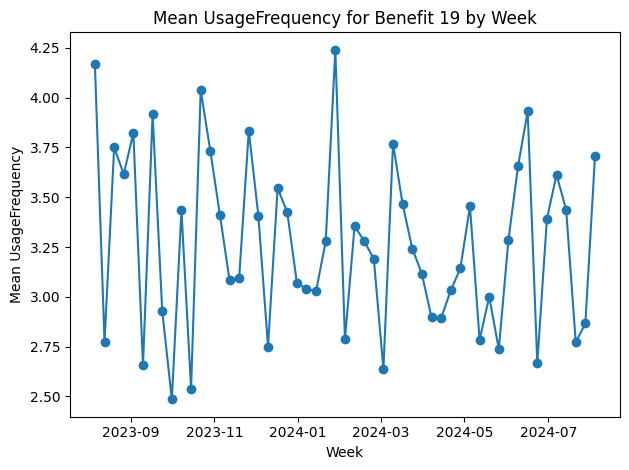

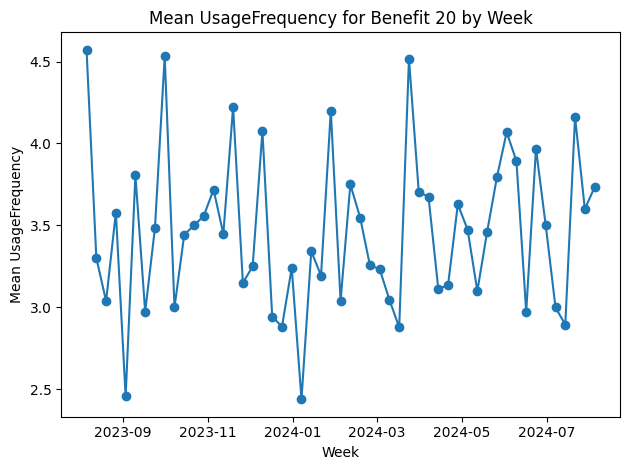

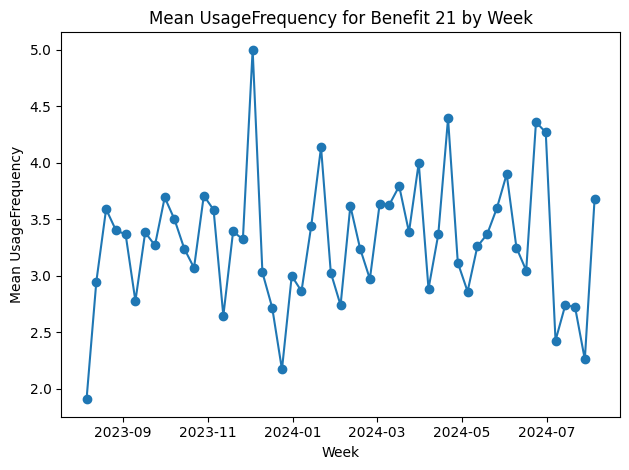

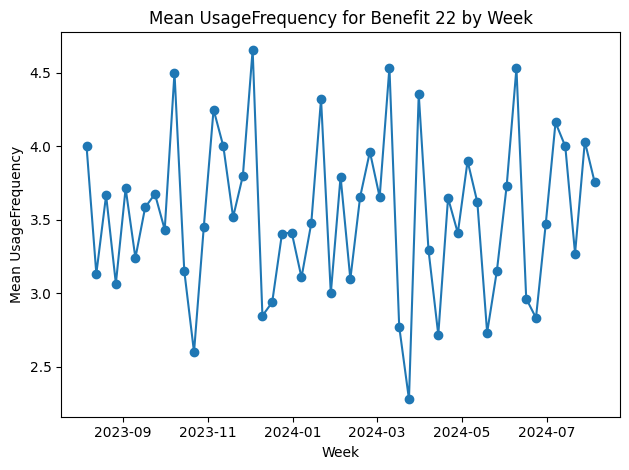

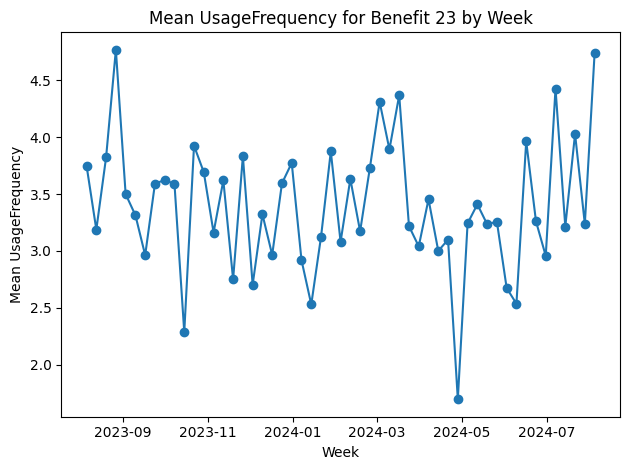

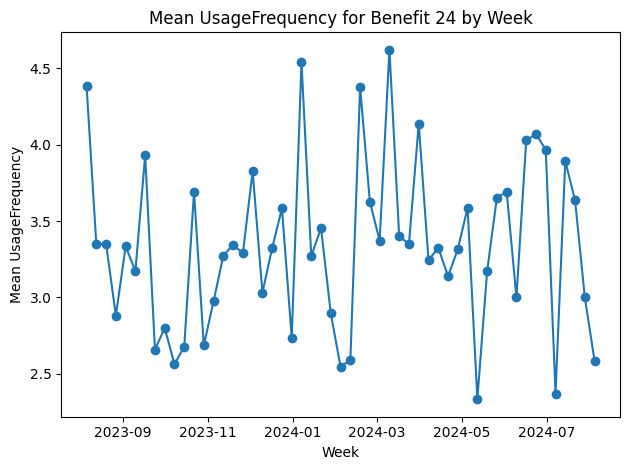

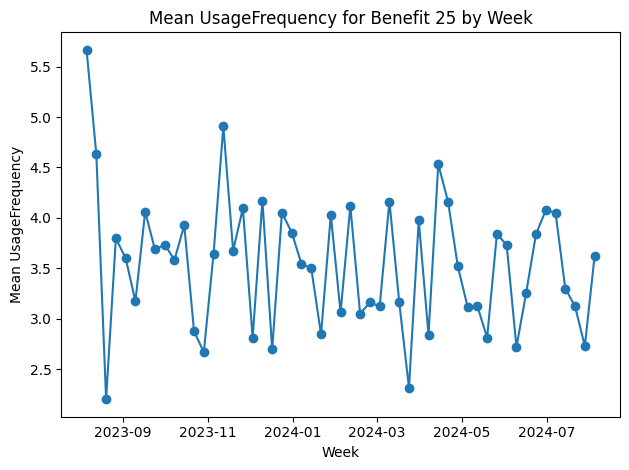

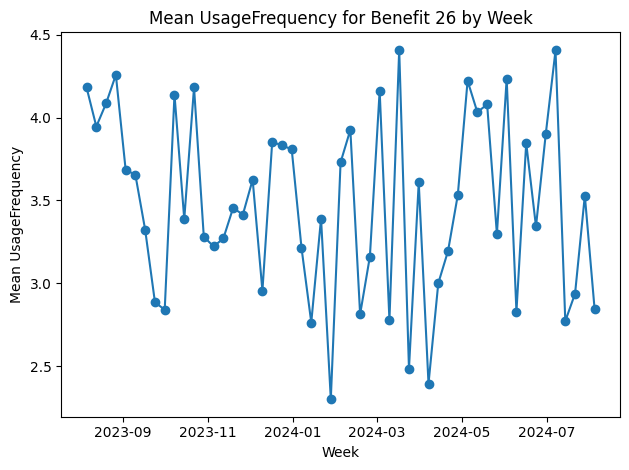

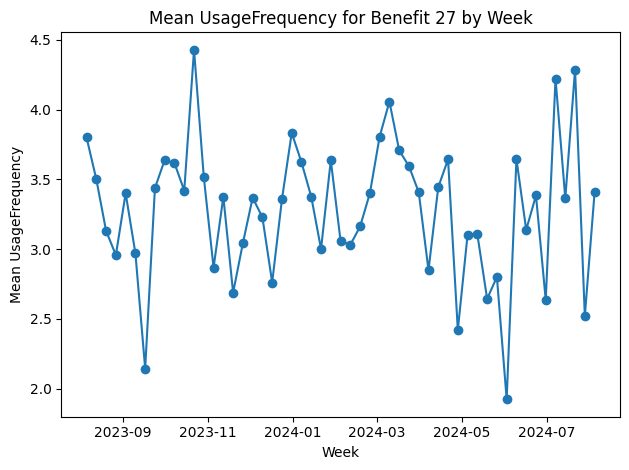

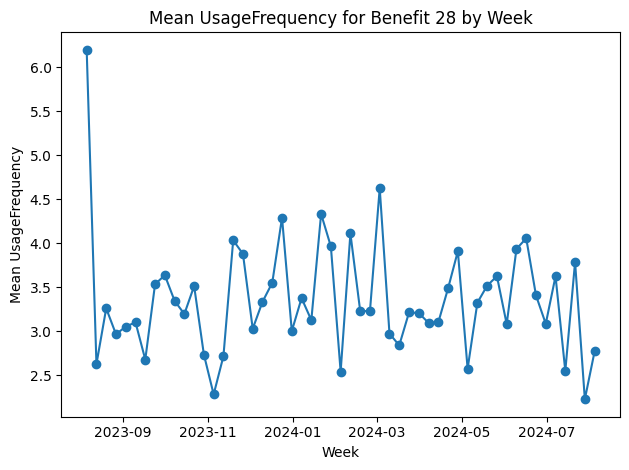

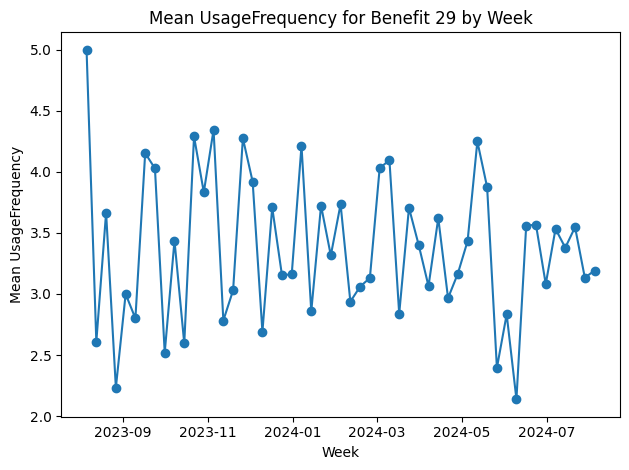

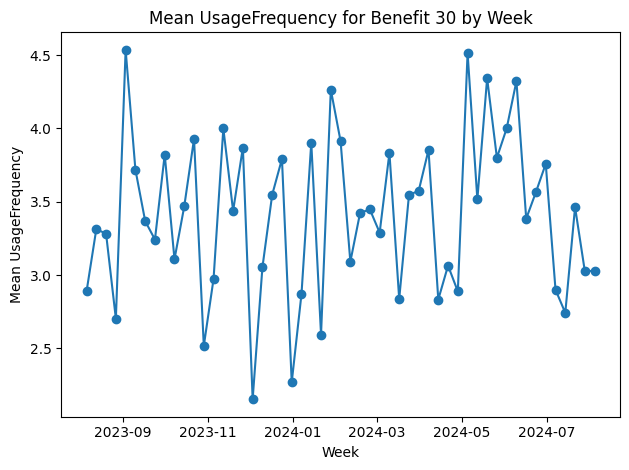

In [26]:
results = plot_mean_usage_by_period(usage, period="week")


In [32]:
results[1]['data']

,LastUsedDate,MeanUsage
0,2023-08-06,4.454545
1,2023-08-13,3.370370
2,2023-08-20,3.476190
3,2023-08-27,3.692308
4,2023-09-03,3.148148
5,2023-09-10,4.942857
6,2023-09-17,3.810811
7,2023-09-24,3.571429
8,2023-10-01,3.121212
9,2023-10-08,2.366667


In [ ]:
# fig = results[1]['ax'].get_figure()
# fig.savefig('benefit_1.png', dpi=150, bbox_inches='tight')
